---
---

<h1><center><ins>Exercise Sheet 6</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
from scipy.integrate import solve_ivp

## Exercise 1 - Radioactive decay

Radioactive decay is the process by which an unstable atomic nucleus loses energy by radiation. The fundamental law of radioactive decay is based on the fact that the decay, i.e. the transition of a parent nucleus to a daughter nucleus is a purely statistical process. The disintegration (decay) probability is a fundamental property of an atomic nucleus and remains equal in time. Mathematically this law is expressed as: 

$$ \frac{d N}{dt} = - \lambda N \ , $$

where $N$ is the number of radioactive nuclei, $dN/dt$ the variation of this number per unit of time, and $\lambda$ is thus the probability of decay per nucleus per unit of time. A more intuitive representation of exponential decay is the time required for the decaying quantity to fall to one half of its initial value. This time, $t_{1/2}$, is called "half-life", and can be written in terms of the decay constant as:

$$ t_{1/2} = \frac{\ln(2)}{\lambda} \ . $$

Let's consider here Carbon-14, for which the decay constant is $\lambda \sim 1.21 \times 10^{-4}$ yr$^{-1}$, and which has a half-life $t_{1/2} \sim 5728$ yr. Its presence in organic materials is the basis of the radiocarbon dating method to date archaeological, geological and hydrogeological samples.

**(A)** Implement _**your own version**_ of the **Euler and Runge Kutta (order 2) algorithms**, and solve the differential equation above by using these methods. Compare the results you obtain to the analytic solution, which can be calculated as:

$$ N = N_0 \exp(-\lambda t) \ ,$$

where $N_0$ is the initial amount of the nuclei $[$i.e., $N(t = 0) = N_0]$.

**(B)** Compute your solution for a sufficient number of steps so that you can determine the **half-life** of Carbon-14. Pay attention to the size of the time-step you are using, and discuss your results when using different time-steps. Which method recovers a value of the half-life that is closer to the real one?

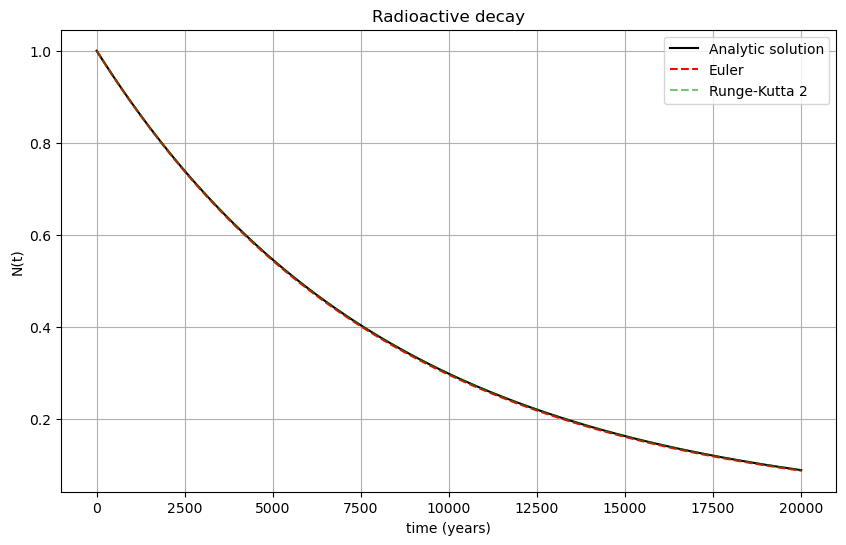

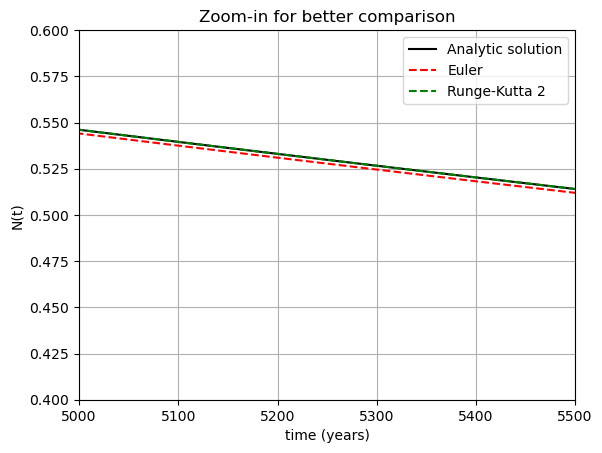

In [21]:
# Parameter 
lamb = 1.21e-4 
N0 = 1.0 
tmax = 20000
dt = 100

# Differentialequation 
def dN_dt(N, t):
    return -lamb * N

# Euler-Method 
def euler_method(N0, dt, tmax):
    t_values = np.arange(0.0, tmax + dt, dt)
    N_values = np.zeros_like(t_values)
    N_values[0] = N0
    
    for i in range(1, len(t_values)):
        N_values[i] = N_values[i-1] + dt * dN_dt(N_values[i-1], t_values[i-1])
    
    return t_values, N_values

# Runge-Kutta 2 
def runge_kutta_method(N0, dt, tmax):
    t_values = np.arange(0.0, tmax + dt, dt)
    N_values = np.zeros_like(t_values)
    N_values[0] = N0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        N = N_values[i-1]

        k1 = dN_dt(N, t)
        k2 = dN_dt(N + dt * k1, t + dt)

        N_values[i] = N + dt * 0.5 * (k1 + k2)

    return t_values, N_values

# Analytic solution 
def analytic_solution(t):
    return N0 * np.exp(-lamb * t)

# solutions 
t_euler, N_euler = euler_method(N0, dt, tmax)
t_rk2, N_rk2 = runge_kutta_method(N0, dt, tmax)
t_analytic = np.linspace(0, tmax, 1000)
N_analytic = analytic_solution(t_analytic)


plt.figure(figsize=(10,6))
plt.plot(t_analytic, N_analytic, 'k-', label='Analytic solution')
plt.plot(t_euler, N_euler, 'r--', label='Euler', alpha = 1)
plt.plot(t_rk2, N_rk2, 'g--', label='Runge-Kutta 2', alpha = 0.5)
plt.xlabel("time (years)")
plt.ylabel("N(t)")
plt.title("Radioactive decay")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(t_analytic, N_analytic, 'k-', label='Analytic solution')
plt.plot(t_euler, N_euler, 'r--', label='Euler', alpha = 1)
plt.plot(t_rk2, N_rk2, 'g--', label='Runge-Kutta 2', alpha = 1) 
plt.xlim(5000, 5500)
plt.ylim(0.4, 0.6)
plt.title("Zoom-in for better comparison")
plt.xlabel("time (years)")
plt.ylabel("N(t)")
plt.legend()
plt.grid(True)
plt.show()


 evaluaton halflife time (Euler vs RK2):

      dt      Euler t1/2     Error Euler          RK2 t1/2       Error RK2
1000.000     5389.649645     -338.839450       5755.219826       26.730731
 500.000     5554.900467     -173.588629       5735.910437        7.421342
 200.000     5659.401165      -69.087931       5729.611741        1.122645
 100.000     5693.796959      -34.692136       5728.753883        0.264787
  50.000     5711.169179      -17.319916       5728.561256        0.072161
  20.000     5721.556562       -6.932533       5728.500610        0.011515
  10.000     5725.024174       -3.464922       5728.491270        0.002174
   5.000     5726.756398       -1.732698       5728.489764        0.000669
   2.000     5727.795943       -0.693153       5728.489196        0.000101
   1.000     5728.142522       -0.346573       5728.489125        0.000029
   0.500     5728.315811       -0.173285       5728.489099        0.000004
   0.100     5728.454438       -0.034657       5728.48909

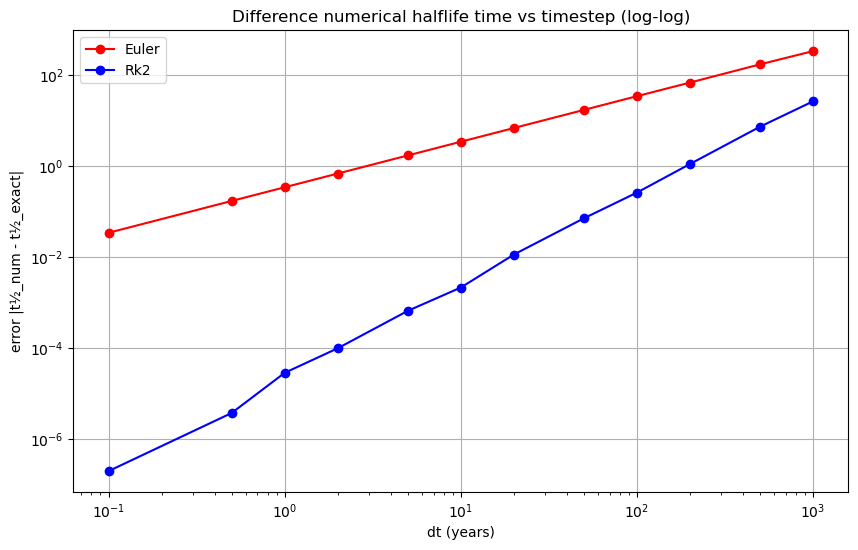

In [25]:
halflife = log(2)/lamb

def euler_step(N, dt):
    return N + dt * dN_dt(N, 0)

def rk2_step(N, dt):
    k1 = dN_dt(N, 0)
    N_pred = N + dt * k1
    k2 = dN_dt(N_pred, 0)
    return N + 0.5 * dt * (k1 + k2)

# numerical half life time 
def estimate_half_life(method_step, dt):
    N = N0
    t = 0
    N_half = N0 / 2

    # läuft bis N < N0/2
    while N > N_half:
        N_next = method_step(N, dt)
        if N_next <= N_half:
            # Linear interpolation last two points 
            frac = (N - N_half) / (N - N_next)
            return t + frac * dt
        N = N_next
        t += dt

    return None

# halflife time for different dt-values 
dt_values = [1000, 500, 200, 100, 50, 20, 10, 5, 2, 1, 0.5, 0.1]

print("\n evaluaton halflife time (Euler vs RK2):\n")
print(f"{'dt':>8} {'Euler t1/2':>15} {'Error Euler':>15}   "
      f"{'RK2 t1/2':>15} {'Error RK2':>15}")

for dt in dt_values:
    t_half_eu = estimate_half_life(euler_step, dt)
    t_half_rk = estimate_half_life(rk2_step, dt)

    err_eu = t_half_eu - t_half_analytic
    err_rk = t_half_rk - t_half_analytic

    print(f"{dt:8.3f} {t_half_eu:15.6f} {err_eu:15.6f}   "
          f"{t_half_rk:15.6f} {err_rk:15.6f}")


errors_euler = []
errors_rk2 = []

for dt in dt_values:
    t_half_eu = estimate_half_life(euler_step, dt)
    t_half_rk = estimate_half_life(rk2_step, dt)

    errors_euler.append(abs(t_half_eu - t_half_analytic))
    errors_rk2.append(abs(t_half_rk - t_half_analytic))

plt.figure(figsize=(10,6))
plt.loglog(dt_values, errors_euler, "ro-", label="Euler")
plt.loglog(dt_values, errors_rk2, "bo-", label="Rk2")
plt.xlabel("dt (years)")
plt.ylabel("error |t½_num - t½_exact|")
plt.title("Difference numerical halflife time vs timestep (log-log)")
plt.grid(True)
plt.legend()
plt.show()


In [2]:
lamb = 1.21 * 10**(-4)
halflife = log(2)/lamb

## Exercise 2 - The motion of a pendulum

The differential equation describing the motion of a simple pendulum of length $l$ is

$$ \frac{d^2 \theta}{dt} = - \frac{g}{l} \sin(\theta) \ , $$

where $g$ is the local acceleration of gravity (on Earth, $g = 9.8$ m/s$^2$). For this exercise, consider $l = 10$ m. Here we will consider the simple case in which the maximal displacement of the pendulum is small, so that we can use the approximation $\sin(\theta) \approx \theta$ and consider the following, simplified, equation:

$$ \frac{d^2 \theta}{dt} = - \frac{g}{l} \theta \ . $$

This equation can be solved analytically, giving the following expression for $\theta(t)$:

$$ \theta(t) = \theta_0 \cos \left(\sqrt{\frac{g}{l}} \, t \right) \ .$$

**(A)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically by implementing _**your own version**_ of the **Euler method**. Consider that at a time $t = 0$ the pendulum is at $\theta = 0.1$ radians, and it is not moving. 

**(B)** What is the displacement ($\theta$) of the pendulum at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s in your ODE integrator? How different is the value you obtain from the true one (calculated with the above equation)? How small should the time step be, if you want to have a discrepancy of at most 0.01 in the value of $\theta(t = 20$ s$)$?

**(C)** Implement _**your own version**_ of the **Euler-Cromer and Runge Kutta (order 4) algorithms**, and solve the differential equation again by using these methods. How big is the discrepancy from the real solution for these methods, at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s?

natural frequency sqrt(g/l) = 0.989949  1/s, period T = 6.3470 s


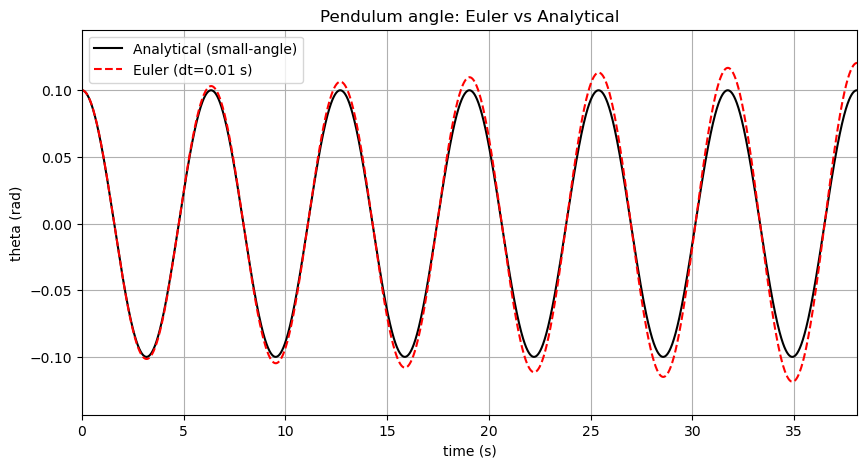

In [28]:
g, l = 9.8,10  
omega0 = 0.0 # initial angular velocity omega, dteta/dt 
theta0 = 0.1
t_max = 60.0
dt = 0.01 

# Derived
omega_nat = np.sqrt(g / l)      # natural angular frequency (rad/s)
period = 2 * np.pi / omega_nat  
print(f"natural frequency sqrt(g/l) = {omega_nat:.6f}  1/s, period T = {period:.4f} s")

# Time array
t = np.arange(0.0, t_max + dt, dt)

# Arrays for numerical solution
theta_euler = np.zeros_like(t)
omega_euler = np.zeros_like(t)

# initial conditions
theta_euler[0] = theta0
omega_euler[0] = omega0

# Forward Euler integration
for n in range(len(t) - 1):
    theta_euler[n+1] = theta_euler[n] + dt * omega_euler[n]
    omega_euler[n+1] = omega_euler[n] + dt * ( - (g / l) * theta_euler[n] )

# Analytical solution (small-angle)
theta_exact = theta0 * np.cos(omega_nat * t)

plt.figure(figsize=(10,5))
plt.plot(t, theta_exact, 'k-', label='Analytical (small-angle)')
plt.plot(t, theta_euler, 'r--', label=f'Euler (dt={dt} s)')
plt.xlabel('time (s)')
plt.ylabel('theta (rad)')
plt.title('Pendulum angle: Euler vs Analytical')
plt.legend()
plt.grid(True)
plt.xlim(0, min(6*period, t_max))  # show first few periods
plt.show() 

In [30]:
t_target = 20.0

def analytic_theta(t):
    return theta0 * np.cos(omega_nat * t)

def euler_theta_at(t_target, dt):
    n_steps = int(np.ceil(t_target / dt))
    theta = theta0
    omega = omega0
    t = 0.0
    for i in range(n_steps):
        this_dt = dt if t + dt <= t_target else (t_target - t)
        theta_next = theta + this_dt * omega
        omega_next = omega + this_dt * (-(g / l) * theta)
        theta, omega = theta_next, omega_next
        t += this_dt
    return theta

# analytic 
theta_exact = analytic_theta(t_target)

# Euler with  dt = 0.2
dt = 0.2
theta_eu = euler_theta_at(t_target, dt)
print(f"Analytic theta(20) = {theta_exact:.12f}")
print(f"Euler theta(20), dt={dt}   = {theta_eu:.12f}")
print(f"Absolute diff = {abs(theta_eu - theta_exact):.12f}")

# dt, indem wir von dt=0.5 her halbieren, bis Fehler <= 0.01
dt_try = 0.5
required_dt = None
for _ in range(40):
    val = euler_theta_at(t_target, dt_try)
    if abs(val - theta_exact) <= 0.01:
        required_dt = dt_try
        break
    dt_try /= 2.0

if required_dt is not None:
    print(f"dt (Euler) with error <= 0.01: dt ≈ {required_dt}")
else:
    print("Found no dt in half (maybe very small).")


Analytic theta(20) = 0.058214342873
Euler theta(20), dt=0.2   = 0.524506955249
Absolute diff = 0.466292612377
dt (Euler) with error <= 0.01: dt ≈ 0.015625


In [31]:
dt = 0.2

# Euler-Cromer (symplectic Euler) 
def euler_cromer(theta0, omega0, dt, t_target):
    theta = theta0
    omega = omega0

    t = 0
    steps = int(np.ceil(t_target / dt))

    for i in range(steps):
        # last partial step
        h = dt if t + dt <= t_target else (t_target - t)

        # update velocity first
        omega = omega + h * (-(g/l) * theta)
        theta = theta + h * omega

        t += h

    return theta


# Runge–Kutta 4 (RK4) 
def rk4(theta0, omega0, dt, t_target):
    theta = theta0
    omega = omega0

    t = 0
    steps = int(np.ceil(t_target / dt))

    for i in range(steps):
        h = dt if t + dt <= t_target else (t_target - t)

        # k1
        k1_theta = omega
        k1_omega = - (g/l) * theta

        # k2
        k2_theta = omega + 0.5*h*k1_omega
        k2_omega = - (g/l) * (theta + 0.5*h*k1_theta)

        # k3
        k3_theta = omega + 0.5*h*k2_omega
        k3_omega = - (g/l) * (theta + 0.5*h*k2_theta)

        # k4
        k4_theta = omega + h*k3_omega
        k4_omega = - (g/l) * (theta + h*k3_theta)

        # update
        theta = theta + (h/6.0)*(k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
        omega = omega + (h/6.0)*(k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)

        t += h

    return theta


# result computation 
theta_exact = analytic_theta(t_target)
theta_ec = euler_cromer(theta0, omega0, dt, t_target)
theta_rk4 = rk4(theta0, omega0, dt, t_target)

print(f"Analytic θ(20) = {theta_exact:.12f}")
print(f"Euler-Cromer (dt=0.2) θ(20) = {theta_ec:.12f}   | diff = {abs(theta_ec - theta_exact):.6f}")
print(f"RK4         (dt=0.2) θ(20) = {theta_rk4:.12f}   | diff = {abs(theta_rk4 - theta_exact):.6f}")


Analytic θ(20) = 0.058214342873
Euler-Cromer (dt=0.2) θ(20) = 0.047270360587   | diff = 0.010944
RK4         (dt=0.2) θ(20) = 0.058232243568   | diff = 0.000018


## Exercise 3 - Motion of a mass attached to a spring

The differential equation describing the motion of a particle attached to a spring can be obtained by putting together Newton's 2nd law and Hooke's law, and it can be written as:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Choose some reasonable values for $k$ and $m$, define the initial conditions of your problem, and compute the analytic solution of your specific system, considering that the general solution is given by:

$$ x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} \, t\right) + v_0 \sqrt{\frac{m}{k}} \sin \left(\sqrt{\frac{k}{m}} \, t\right) \ , $$

where $x_0$ and $v_0$ are the position and velocity of the particle at time $t = 0$.

**(B)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically _**by using one of the built-in python methods**_ (take a look at the available methods in the `scipy` package).

**(C)** Plot your solution and compare it to the analytical solution.

Parameter: m = 1.0 kg, k = 4.0 N/m
Eigenfrequency omega = 2.000000 1/s
Period T = 3.141593 s


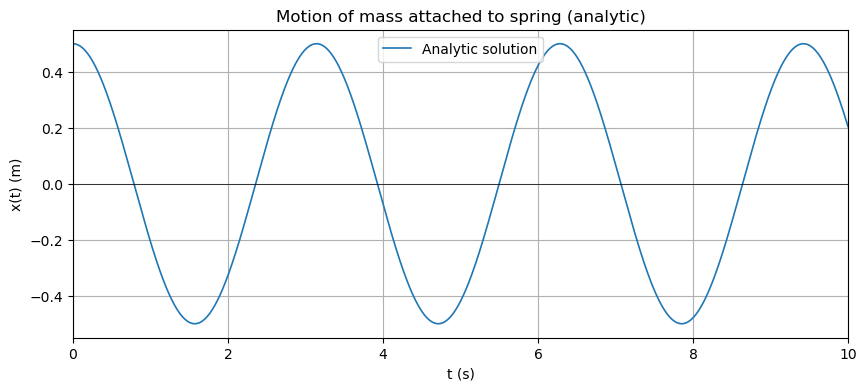

In [43]:
m = 1.0 
k = 4.0 

# initial conditions 
x0 = 0.5 
v0 = 0.0 

# time interval 
t_max = 10.0
dt = 0.001 
t = np.arange(0.0, t_max + dt, dt)

# 
omega = np.sqrt(k / m) # Eigenfrequency 
period = 2 * np.pi / omega 

print(f"Parameter: m = {m} kg, k = {k} N/m")
print(f"Eigenfrequency omega = {omega:.6f} 1/s")
print(f"Period T = {period:.6f} s")

# Analytic solution 
x_analytic = x0 * np.cos(omega * t) + (v0 / omega) * np.sin(omega * t)

plt.figure(figsize=(10,4))
plt.plot(t, x_analytic, label='Analytic solution', linewidth=1.2)
plt.axhline(0, color='k', linewidth=0.5)
plt.xlabel('t (s)')
plt.ylabel('x(t) (m)')
plt.title('Motion of mass attached to spring (analytic)') 
plt.xlim(0, t_max)
plt.grid(True)
plt.legend()
plt.show()

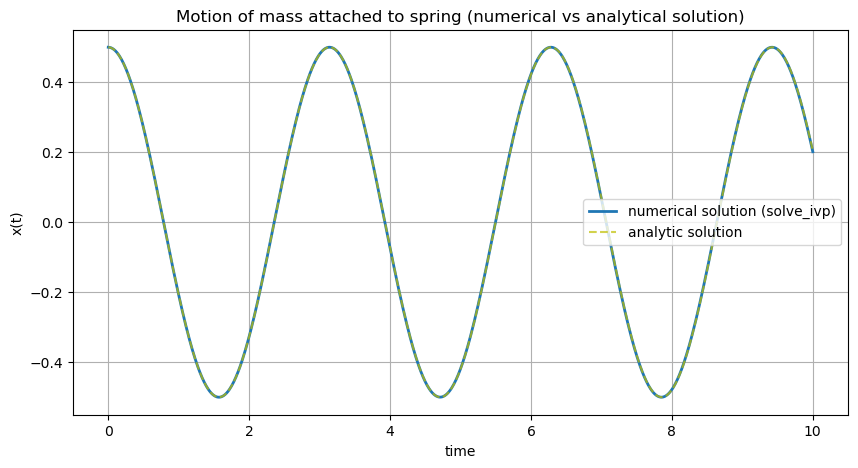

In [44]:
# System first order 
def spring_ode(t, y):
    x, v = y
    dxdt = v
    dvdt = -(k/m) * x
    return [dxdt, dvdt]

# time interval 
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# numerical solution with solve_ivp
solution = solve_ivp(
    spring_ode, 
    t_span, 
    [x0, v0], 
    t_eval=t_eval, 
    method='RK45'
)

t = solution.t
x_numeric = solution.y[0]

# analytical solution for comparison 
omega = np.sqrt(k/m)
x_analytic = x0*np.cos(omega*t) + (v0/omega)*np.sin(omega*t) 

plt.figure(figsize=(10,5))
plt.plot(t, x_numeric, label="numerical solution (solve_ivp)", linewidth=2)
plt.plot(t, x_analytic, 'y--', label="analytic solution", alpha=0.7)
plt.xlabel("time")
plt.ylabel("x(t)")
plt.title("Motion of mass attached to spring (numerical vs analytical solution)")
plt.grid(True)
plt.legend()
plt.show()